# Build a Serverless Web Application

## Overview

We'll create a simple serverless web application that enables users to request unicorn rides from the Wild Rydes fleet. The application will present users with an HTML based user interface for indicating the location where they would like to be picked up and will interface on the backend with a RESTful web service to submit the request and dispatch a nearby unicorn. The application will also provide facilities for users to register with the service and log in before requesting rides.

### Application Architecture

The application architecture uses AWS Lambda, Amazon API Gateway, Amazon DynamoDB, Amazon Cognito, and AWS Amplify Console/s3. Amplify Console provides continuous deployment and hosting of the static web resources including HTML, CSS, JavaScript, and image files which are loaded in the user's browser. JavaScript executed in the browser sends and receives data from a public backend API built using Lambda and API Gateway. Amazon Cognito provides user management and authentication functions to secure the backend API. Finally, DynamoDB provides a persistence layer where data can be stored by the API's Lambda function.

#### using AWS Amplify console to host web resource

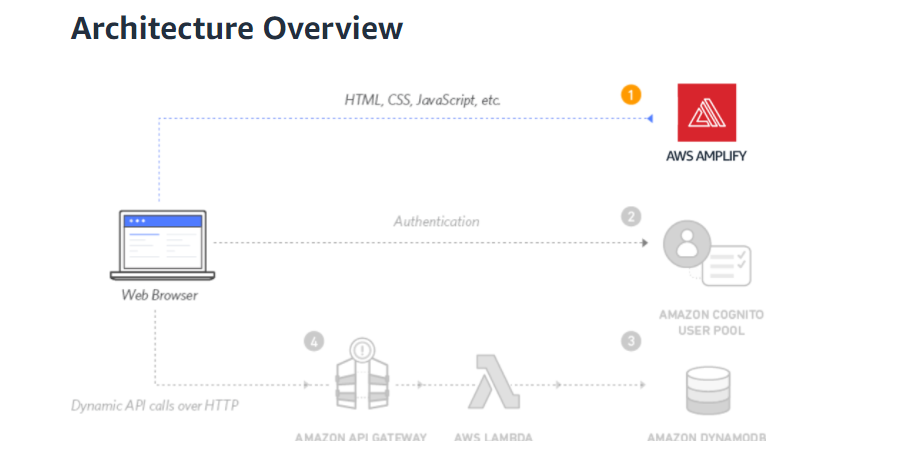

#### using AWS s3 to host web resource

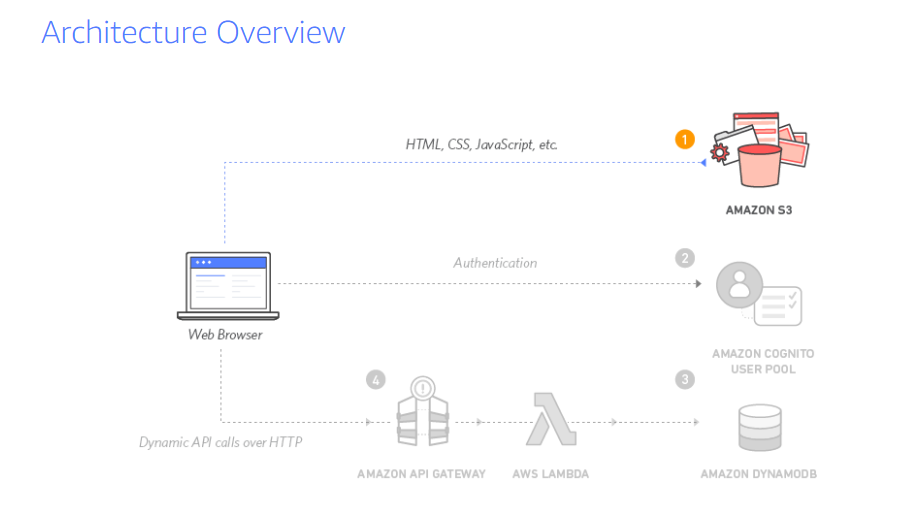

## MODULE 1:Static Web Hosting with Continuous Deployment


To get started, you will configure AWS Amplify to host the static resources for your web application with continuous deployment built-in

#### Overview

We'll configure AWS Amplify to host the static resources for our web application with continuous deployment built-in. 

The Amplify Console provides a git-based workflow for continuous deployment & hosting of fullstack web apps. In subsequent modules we'll add dynamic functionality to these pages using JavaScript to call remote RESTful APIs built with AWS Lambda and Amazon API Gateway.

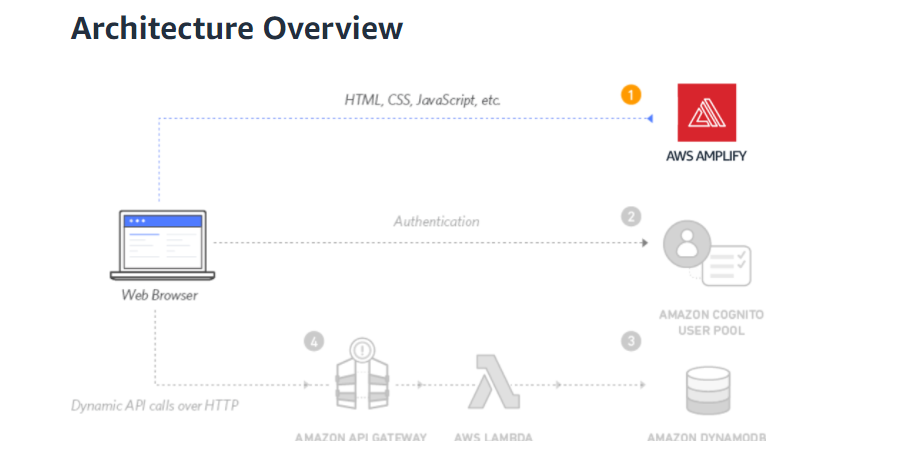

The architecture for this module is very straightforward. All of our static web content including HTML, CSS, JavaScript, images and other files will be managed by AWS Amplify Console. End users will then access your site using the public website URL exposed by AWS Amplify Console. We don't need to run any web servers or use other services in order to make your site available.

For most real applications we'll want to use a custom domain to host your site. Refer AWS Amplify Documentation to do that.

### IMPLEMENATION

In [ ]:
1. Choose a region in which we want to deploy our web application, also ensuring all services are available.

Options: us-east-1, us-west-2

In [ ]:
2. Create a git repository

We have two options to manage the source code for this module:  AWS CodeCommit  or GitHub.

3. Once you've used either AWS CodeCommit or GitHub.com to create your git repository and clone it locally, you'll need to copy    the web site content from an existing publicly accessible S3 bucket associated with this workshop and add the content to        your repository.

a. Change directory into your repository and copy the static files from S3:
    cd wildrydes-site
    /aws s3 cp s3://wildrydes-us-east-1/WebApplication/1_StaticWebHosting/website ./ --recursive

b. Commit the files to your Git service
    $ git add .
    $ git commit -m 'new'
    $ git push

4. Enable web hosting with AWS Amplify Console.

Weu'll use the AWS Amplify Console to deploy the website we've just committed to git. The Amplify Console takes care of the work of setting up a place to store your static web application code and provides a number of helpful capabilities to simplify both the lifecycle of that application as well as enable best practices.

a. Launch the Amplify Console console page
b. Click Get Started under Deploy with Amplify Console
c. Select the Repository service provider used today and select Next
d. If you used GitHub, you'll need to authorize AWS Amplify to your GitHub account
e. From the dropdown select the Repository and Branch just created Add repository branch
e. On the "Configure build settings" page leave all the defaults and select Next.
f. On the "Review" page select Save and deploy
g. The process takes a couple of minutes for Amplify Console to create the necessary resources and to deploy your code.
Amplify Console
Once completed, click on the site image to launch your Wild Rydes site.

https://aws.amazon.com/getting-started/hands-on/build-serverless-web-app-lambda-apigateway-s3-dynamodb-cognito/module-1/

AWS Amplify Console makes it really easy to deploy static websites following a continuous integration and delivery model. It has capabilities for "building" more complicated Javascript framework based applications and has features such as feature branch deployments, easy custom domain setup, instant deployments, and password protection.

## MODULE 1:Static Web Hosting using S3

In this module we'll configure Amazon Simple Storage Service (S3) to host the static resources for your web application. In subsequent modules we'll add dynamic functionality to these pages using JavaScript to call remote RESTful APIs built with AWS Lambda and Amazon API Gateway.

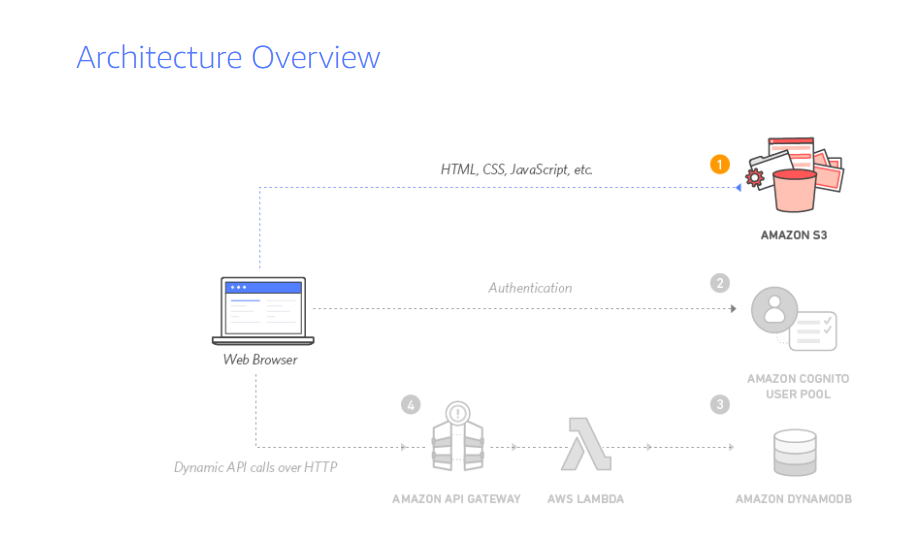

The architecture for this module is very straightforward. All of our static web content including HTML, CSS, JavaScript, images and other files will be stored in Amazon S3. End users will then access our site using the public website URL exposed by Amazon S3. We don't need to run any web servers or use other services in order to make your site available.

For the purposes of this module we'll use the Amazon S3 website endpoint URL that we supply. 
It takes the form http://{your-bucket-name}.s3-website.{region}.amazonaws.com. 

For most real applications you'll want to use a custom domain to host your site. Follow the instructions for setting up a static website using a custom domain in the Amazon S3 documentation.

### Implementation

In [ ]:
1. Choose a region in which we want to deploy our web application, also ensuring all services are available.

Options: us-east-1, us-west-2

2. Create an S3 Bucket, and upload content:
    aws s3 sync s3://wildrydes-us-east-1/WebApplication/1_StaticWebHosting/website s3://YOUR_BUCKET_NAME --region YOUR_BUCKET_REGION

In [ ]:
3. Add a Bucket Policy to Allow Public Reads


In the S3 console, select the name of the bucket you created in section 1.
Choose the Permissions tab, then choose Bucket Policy.
In the S3 console, select the name of the bucket you created in section 1.
Choose the Permissions tab, then make sure Public access settings is selected.
Click on Edit and uncheck:
"Block new public bucket policies"
"Block public and cross-account access if bucket has public policies"
Click Save.
In the confirmation modal that appears, type 'confirm' and then click Confirm. 
While still in the Permissions tab, choose Bucket Policy.  
Enter the following policy document into the bucket policy editor replacing [YOUR_BUCKET_NAME] with the name of the bucket you created in section 1:
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow", 
            "Principal": "*", 
            "Action": "s3:GetObject", 
            "Resource": "arn:aws:s3:::[YOUR_BUCKET_NAME]/*" 
        } 
    ] 
}
Choose Save to apply the new policy.

4. Enable Website Hosting

By default objects in an S3 bucket are available via URLs with the structure http://.amazonaws.com//. In order to serve assets from the root URL (e.g. /index.html), you'll need to enable website hosting on the bucket. This will make your objects available at the AWS Region-specific website endpoint of the bucket: .s3-website-.amazonaws.com.

You can also use a custom domain for your website. For example http://www.wildrydes.com is hosted on S3. Setting up a custom domain is not covered in this workshop, but you can find detailed instructions in our documentation.

In this step, you will use the console to enable static website hosting. You can do this on the Properties tab after you've selected the bucket. Set index.html as the index document, and leave the error document blank. See the documentation on configuring a bucket for static website hosting for more details.


- From the bucket detail page in the S3 console, choose the Properties tab.
- Choose the Static website hosting card.
- Select Use this bucket to host a website and enter index.html for the Index document. Leave the other fields blank.
- Note the Endpoint URL at the top of the dialog before choosing Save. You will use this URL throughout the rest of the workshop to view your web application. From here on this URL will be referred to as your website's base URL.
- Click Save to save your changes.